# Describing Data

### What do you find in this notebook?

In this exercise, first, you will familiarize yourself with the Python libraries 'statsmodels' and 'SciPy' that let you do statistical analysis: calculate descriptive statistics, sample datapoints, study relationships between variables, and perform hypothesis testing. Then, second, you will work on a set of exercises that will let you practice your skills.

Here we show a couple of examples of how to do common analyses, but there are many more useful probability distributions and statistical tests. In the linked documentation, you will find complete information, and a lot more details compared to what is outlined in this notebook:
- [statsmodels](https://www.statsmodels.org/stable/examples/index.html), [more complete documentation](https://www.statsmodels.org/stable/stats.html)
- [SciPy](https://docs.scipy.org/doc/scipy/reference/stats.html)

# Tutorial: How to use the libraries

- You will be working with the full US 2015 census dataset (acs2015_county_data.csv, available at https://www.kaggle.com/muonneutrino/us-census-demographic-data#acs2015_county_data.csv). Here we load it. Take some time to familiarize yourself with the contents. One row represents one county.

In [1]:
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import math

#load the statistical libraries
from statsmodels.stats import diagnostic
from scipy import stats

In [2]:
data_folder = './data/'
df = pd.read_csv(data_folder + 'acs2015_county_data.csv')

In [3]:
df.columns

Index(['CensusId', 'State', 'County', 'TotalPop', 'Men', 'Women', 'Hispanic',
       'White', 'Black', 'Native', 'Asian', 'Pacific', 'Citizen', 'Income',
       'IncomeErr', 'IncomePerCap', 'IncomePerCapErr', 'Poverty',
       'ChildPoverty', 'Professional', 'Service', 'Office', 'Construction',
       'Production', 'Drive', 'Carpool', 'Transit', 'Walk', 'OtherTransp',
       'WorkAtHome', 'MeanCommute', 'Employed', 'PrivateWork', 'PublicWork',
       'SelfEmployed', 'FamilyWork', 'Unemployment'],
      dtype='object')

In [6]:
df.sample(10)

,CensusId,State,County,TotalPop,Men,Women,Hispanic,White,Black,Native,...,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
2516,47177,Tennessee,Warren,40015,19801,20214,8.4,86.5,1.3,0.1,...,1.4,1.1,3.3,24.0,16304,77.3,14.1,8.1,0.5,8.0
2079,39073,Ohio,Hocking,28914,14521,14393,0.8,96.7,0.8,0.0,...,1.8,1.0,3.1,31.2,12199,76.7,16.6,6.2,0.6,9.5
3213,72141,Puerto Rico,Utuado,31474,15368,16106,99.6,0.3,0.1,0.0,...,7.8,0.7,1.0,32.4,6819,58.0,34.0,7.3,0.7,28.8
2917,51530,Virginia,Buena Vista city,6666,3062,3604,1.4,88.9,1.1,0.0,...,7.0,2.5,1.4,15.6,2824,82.6,15.0,2.3,0.0,7.3
1115,22005,Louisiana,Ascension,114738,56848,57890,5.0,69.8,21.8,0.1,...,1.1,0.8,3.3,30.4,55380,81.6,13.4,4.9,0.1,6.4
3193,72101,Puerto Rico,Morovis,32294,16067,16227,99.8,0.1,0.0,0.0,...,4.7,1.2,1.0,37.9,7740,72.5,22.9,4.4,0.2,24.7
1818,35043,New Mexico,Sandoval,136638,67141,69497,36.9,45.5,1.9,11.9,...,1.3,1.5,5.7,29.2,58433,72.3,21.4,6.2,0.1,9.2
2172,40083,Oklahoma,Logan,44493,21995,22498,5.5,77.9,9.1,3.7,...,2.5,1.2,4.0,28.0,20281,76.0,18.0,5.8,0.2,6.0
1637,30079,Montana,Prairie,1372,733,639,0.8,96.1,0.0,1.1,...,7.2,1.1,20.0,13.8,543,46.4,23.6,27.4,2.6,8.1
757,18121,Indiana,Parke,17107,8098,9009,1.3,95.0,2.0,0.2,...,2.3,1.5,3.8,26.8,6730,79.6,13.0,7.1,0.2,7.8


- We will focus first on income per capita across counties.

<Axes: >

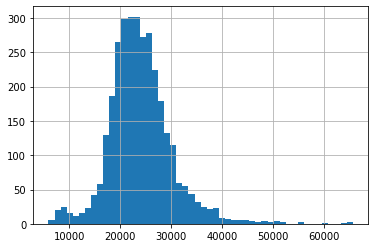

In [7]:
df['IncomePerCap'].hist(bins = 50)

### 1. Calculating descriptive statisctics

- Let's calculate basic descriptive statistics of the income per capita.

In [8]:
df['IncomePerCap'].describe()

count     3220.000000
mean     23981.771739
std       6204.339960
min       5878.000000
25%      20238.500000
50%      23460.000000
75%      27053.250000
max      65600.000000
Name: IncomePerCap, dtype: float64

- What distribution does the data come from? Here is how we can test the goodness of the fit.

In [10]:
# does the data come from a normal distrbution?
'''
- It performs Kolmogorov-Smirnov test (KS test)
- KS test check if the data in the 'IncomePerCap' col follows a certain distribution. Below, we check if it's Normal distribution since argument is (dist='norm')
- Ho: values come from Normal dist , Ha: values do NOT come from Normal dist
- The test will return two values:
    1. Test Statistic: 
        - A value that indicates how different the sample distribution is from a Normal distribution. Its actually maximum abs difference between your dist and Normal dist (or dist your'e checking)
        - High value under Ha i-e when values do NOT come from Normal dist
        - Small value (close to 0) under Ho, indicating value come from a Normal dist.
    2. P-value: 
        - If it's low e.g,  <0.05, it means we reject null hypothesis i-e value do NOT come from a Normal distribution.
        - If it's high e.g, >0.05, it means Ho is likely i-e value come from a Normal dist and there's no evidence to reject this idea

- Analysis of output:
    - From the output, test-statisic = S = 0.06376, p-value: 0.00099 < 0.05 --> we reject Ho i-e we reject that it's Normal dist.
    - High S value, more likely it's NOT Normal since S is large under Ha. 
    - P(S >= 0.06376 | Ho) = 0.0099 < 0.05 --> It's unlikely that extreme value of 0.06376 (indicating it's NOT normal) happens by chance since prob low, so it means we get more support for Ha i-e values do NOT belong to Normal dist
'''
#diagnostic.kstest_normal(df['IncomePerCap'].values, dist = 'norm')
diagnostic.kstest_normal(df['IncomePerCap'], dist = 'norm') # same as above

(0.0637621121184162, 0.0009999999999998899)

- p_value < 0.05 -> we can reject the null hypothesis that the data comes from a normal distribution!

In [11]:
#how about exponential?
diagnostic.kstest_normal(df['IncomePerCap'].values, dist = 'exp')

(0.433243770582646, 0.0009999999999998899)

- p < 0.05 -> not exponential either!

### 2. How to sample the data

- Often we need to find random samples from the dataset. We can do so conveniently with pandas wrappers.

In [12]:
#make 10 samples with replacement
sample1_counties = df.sample(n = 10, replace = True)

#make 10 samples without replacement
sample1_counties = df.sample(n = 10, replace = False)

#sometimes we want to sample in an ublanaced way, so that we upsample datapoints of certain characteristic,
#and downsample the others. this can be acieved with weights parameter
#here we sample by upsampling counties with large population
sample2_counties = df.sample(n = 10, replace = False, weights = df['TotalPop'])

In [13]:
#on avergage, the samples in the sample produce with weighting now have higher population, as we wanted!
print(sample1_counties['TotalPop'].mean())
print(sample2_counties['TotalPop'].mean())

77354.3
869444.9


### 3. Examining relationship between two variables

- Is income per capita of a county correlated with the unemployment?

In [14]:
'''
Pearson Correlation:
    - Measures linear relationship between two variables.
    - Range of Values:
        -  1: Perfect positive linear relationship 
        - -1: Perfect negative linear relationship 
        -  0: No linear relationship
    - Assumption: The data should be Normally distributed and the relationship between the variables should be linear.

Output analysis:
    - statistic=0.2646: 
        - This is the Pearson correlation coefficient value. It shows a weak positive correlation of about 0.265 between IncomePerCap and Employed since it is closer to +1.
    - pvalue=9.942e-53: 
        - This p-value indicates the statistical significance of the correlation. 
        - A small p-value (e.g, <0.05) suggests that the correlation is statistically significant i-e did not happen by chance, meaning there is strong evidence against the null hypothesis (no relationship b/w the variables).

'''
stats.pearsonr(df['IncomePerCap'],df['Employed'])

PearsonRResult(statistic=0.26461363203944877, pvalue=9.942215354238633e-53)

- There is a small (0.26), but significant (p < 0.05) positive correlation.

In [16]:
'''
Pearman Correlation:
    - Measures monotonic relationship between two variables, meaning the variables consistently increase or decrease but not necessarily in a linear fashion.
    - Range & values: same as Peason correlation. 
    - Assumption: No specific distribution requirement.
    - Use case: When you have nonlinear relationships or ranked data. This metric tells you how well the ranks of the two variables align. It is more robust to outliers than Pearson.
'''
stats.spearmanr(df['IncomePerCap'],df['Employed'])

SignificanceResult(statistic=0.30770631560595474, pvalue=1.415296431173735e-71)

- Spearman rank coorrelation is also significant.

### 4. Hypothesis testing

- Is income per capita higher in New York counties compared to California counties?

In [18]:
df.loc[df['State'] == 'New York']['IncomePerCap'].mean()
df[df['State'] == 'New York']['IncomePerCap'].mean() # same as above

28189.75806451613

In [19]:
df.loc[df['State'] == 'California']['IncomePerCap'].mean()

27902.603448275862

- We see that there is a ~300$ gap. Quite a lot!
- But is it significantly higher? Let's use a t-test. This is a two-sided test for the null hypothesis that the two independent samples have identical average (expected) values. 

In [20]:
'''
t-test:
    - Measures whether there is a significant difference between the means of two independent groups/samples.
    - Ho: The two groups/samples have similar/same averages. Ha: The two groups do NOT have same averages
    - t-test's test statistic value is large under Ha and smaller under Ho i-e higher value means groups/samples do NOT have same averages.

Output analysis:
    - statistic=0.197:
        - This is test statistic value. It indicates how many standard deviations the "difference between the two means of the two groups" is from zero.
        - Large value under Ha i-e when groups do NOT have same averages. 
        - A higher value indicates that the means of two groups are different, and value close to 0 suggests that the means of the two groups are quite similar.
    - pvalue=0.8434:
        - It's >0.05, meaning we can NOT reject Ho, we accept Ho. This extreme value of 0.197 or more has high probability and can happen by chance i-e we can't say averages of two groups are same.
        - In other words, the data does not provide enough evidence to say that the average of per capita income of the two states is different; the observed difference could simply be due to random chance.
'''
stats.ttest_ind( df.loc[df['State'] == 'New York']['IncomePerCap'] ,  df.loc[df['State'] == 'California']['IncomePerCap'] )

Ttest_indResult(statistic=0.19788117232375713, pvalue=0.8434785239169611)

- p is not smaller than 0.05 -> we cannot reject the null hypothesis that the income is the same -> there is no significant difference

### 5. How to measure uncertainty
- Now we see the importance of mesuring uncertainty and indicating it on data visualizations.
- Visual inspection of 95% confidence intervals lets us see that the difference is not significant (the errorbars are overlapping).

(25000.0, 32000.0)

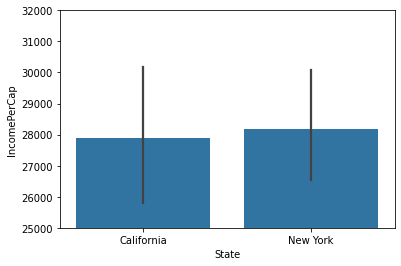

In [21]:
'''
- Below automatically displays error bars.
- Error bars are big, meaning that the difference we see between California and New York is actually not that significant
'''
ax = sns.barplot(x="State", y="IncomePerCap", data=df.loc[df['State'].isin(['New York','California'])])
plt.ylim([25000,32000])

# Exercise 1: Boosting the economy by incentivizing self-employment

Assume the biggest priority of the local government in 2018 is to increase per-capita income. To do so, the officials plan to adopt a strategy for incentivizing self-employment through a series of campaigns, educational programs, and dedicated funds.

Since it is unethical and impossible in this setting to run a controlled experiment involving citizens (e.g., fire employees and force them to self-employ), the officials have asked you, the data scientist, to establish the effect of self-employment on the economy, relying on observational data.

**A)** Using suitable methods, determine and quantify the dependency between the percentage of self-employed citizens and per capita income across all 3,212 US counties. Do citizens in counties that have a higher percentage of self-employed people earn more per capita?

In [22]:
df

,CensusId,State,County,TotalPop,Men,Women,Hispanic,White,Black,Native,...,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
0,1001,Alabama,Autauga,55221,26745,28476,2.6,75.8,18.5,0.4,...,0.5,1.3,1.8,26.5,23986,73.6,20.9,5.5,0.0,7.6
1,1003,Alabama,Baldwin,195121,95314,99807,4.5,83.1,9.5,0.6,...,1.0,1.4,3.9,26.4,85953,81.5,12.3,5.8,0.4,7.5
2,1005,Alabama,Barbour,26932,14497,12435,4.6,46.2,46.7,0.2,...,1.8,1.5,1.6,24.1,8597,71.8,20.8,7.3,0.1,17.6
3,1007,Alabama,Bibb,22604,12073,10531,2.2,74.5,21.4,0.4,...,0.6,1.5,0.7,28.8,8294,76.8,16.1,6.7,0.4,8.3
4,1009,Alabama,Blount,57710,28512,29198,8.6,87.9,1.5,0.3,...,0.9,0.4,2.3,34.9,22189,82.0,13.5,4.2,0.4,7.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3215,72145,Puerto Rico,Vega Baja,56858,27379,29479,96.4,3.4,0.1,0.0,...,1.2,1.3,0.3,32.0,13660,78.3,17.6,4.1,0.0,15.2
3216,72147,Puerto Rico,Vieques,9130,4585,4545,96.7,2.9,0.0,0.0,...,10.8,0.0,1.4,14.0,2860,44.5,41.6,13.6,0.3,12.2
3217,72149,Puerto Rico,Villalba,24685,12086,12599,99.7,0.0,0.0,0.0,...,3.2,0.0,3.3,26.9,6795,59.2,27.5,13.1,0.2,25.9
3218,72151,Puerto Rico,Yabucoa,36279,17648,18631,99.8,0.2,0.0,0.0,...,2.3,2.3,1.5,29.5,8083,65.1,27.6,7.3,0.0,24.3


kstest: ts=0.064, p_val=0.001
pearson: test_stat=0.087, p_val=0.0000007
spearman: test_stat=0.056, p_val=0.0013624

Q. Do citizens in counties that have a higher percentage of self-employed people earn more per capita?
Ans. No. Both Pearson & Spearman coefficient between "Income per Capita" & "Self Employed" are close to 0 and stastistically signiciant (p_value < 0.05).



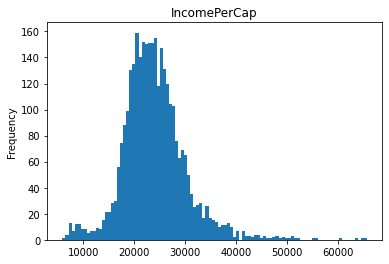

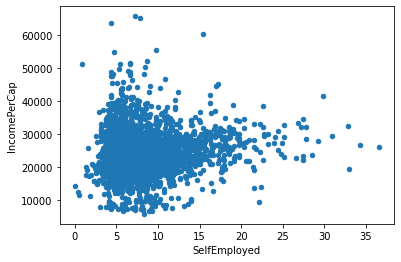

In [46]:
### your code and or answer here ###

# check if IncomePerCap is Normally distributed:
ts, p_val = diagnostic.kstest_normal(df['IncomePerCap'], dist = 'norm') # same as above
print(f"kstest: ts={ts:.3f}, p_val={p_val:0.3f}") # test stastic= 0.063 (clost to 0), p-value=0.000999 < 0.05 (stasticially significant). So, it's safe to say it's Normally Dist. So, we can use Pearson Coefficient to measure linear dependence.
df['IncomePerCap'].plot.hist(bins=100)
plt.title("IncomePerCap")

# pearson correlation coefficient
ts, p_val = stats.pearsonr(df['IncomePerCap'],df['SelfEmployed']) 
print(f"pearson: test_stat={ts:.3f}, p_val={p_val:0.7f}") # test stastic= 0.087 (close to 0), p-value=0.0000007 < 0.05 (stasticially significant). So, they are NOT linearly correlated & this result is statsitically significant.
df.plot.scatter(x="SelfEmployed",y="IncomePerCap") # it's also evident visibly when we plot

# spearman correlation coefficient
ts, p_val = stats.spearmanr(df['IncomePerCap'],df['SelfEmployed'])
print(f"spearman: test_stat={ts:.3f}, p_val={p_val:0.7f}") # test stastic= 0.056 (close to 0), p-value=0.00136 < 0.05 (stasticially significant). So, they are NOT monotonically correlated & this result is statsitically significant.

print('''
Q. Do citizens in counties that have a higher percentage of self-employed people earn more per capita?
Ans. No. Both Pearson & Spearman coefficient between "Income per Capita" & "Self Employed" are close to 0 and stastistically signiciant (p_value < 0.05).
''')


**B)** The pilot program will involve all counties within a limited set of three US states. Set A includes Wisconsin, Tennessee, and  Minnesota. Quantify the dependency of per-capita income on self-employment rates across all the counties in set A.

In [56]:
### your code and or answer here ###
df_A = df[df["State"].isin(["Wisconsin", "Tennessee", "Minnesota"])]

# pearson correlation coefficient
ts, p_val = stats.pearsonr(df_A['IncomePerCap'], df_A['SelfEmployed']) 
print(f"pearson: test_stat={ts:.3f}, p_val={p_val:0.7f}") # test stastic= -0.202 (slightly closer to -1), p-value=0.00118 < 0.05 (stasticially significant). So, they are weakkly -vely linearly correlated & this result is statsitically significant.

# spearman correlation coefficient
ts, p_val = stats.spearmanr(df_A['IncomePerCap'], df_A['SelfEmployed'])
print(f"spearman: test_stat={ts:.3f}, p_val={p_val:0.7f}") # test stastic= 00.237 (slightly closer to -1)), p-value=0.0014 < 0.05 (stasticially significant). So, they are weakly -vely monotonically correlated & this result is statsitically significant.

print('''
Q. Quantify the dependency of per-capita income on self-employment rates across all the counties in set A.
Ans. They are weakly -vely correlated in set A. Both Pearson & Spearman coefficient between "Income per Capita" & "Self Employed" here is slightly -ve (closer to -1) and stastistically signiciant (p_value < 0.05).
''')

pearson: test_stat=-0.202, p_val=0.0011882
spearman: test_stat=-0.237, p_val=0.0001401

Q. Quantify the dependency of per-capita income on self-employment rates across all the counties in set A.
Ans. They are weakly -vely correlated in set A. Both Pearson & Spearman coefficient between "Income per Capita" & "Self Employed" here is slightly -ve (closer to -1) and stastistically signiciant (p_value < 0.05).



**C)** In which state within set A is the observed effect of self-employment on per-capita income the strongest?

In [111]:
### your code and or answer here ###
df_A_grouped = df_A.groupby("State").apply(lambda group: pd.Series(stats.pearsonr(group['IncomePerCap'], group['SelfEmployed']) + stats.spearmanr(group['IncomePerCap'], group['SelfEmployed']), index=["pearson", "pearson_pval", "spearman", "spearman_pval"]))
print(df_A_grouped.head())

max_abs_pearson = df_A_grouped["pearson"].abs().max() # only returns max abs value
state = df_A_grouped["pearson"].abs().idxmax()
p_val = df_A_grouped.loc[state]["pearson_pval"]

print(f"\n{state} has the strongest effect of self-emplotement on per-capita income (since it's spearman coeff {max_abs_pearson:.3f} is closest to ±1) and p_val {p_val:.4f} <0.05)")

            pearson  pearson_pval  spearman  spearman_pval
State                                                     
Minnesota -0.253855      0.017665 -0.211075       0.049708
Tennessee -0.238360      0.020012 -0.316991       0.001749
Wisconsin -0.329053      0.004768 -0.463513       0.000041

Wisconsin has the strongest effect of self-emplotement on per-capita income (since it's spearman coeff 0.329 is closest to ±1) and p_val 0.0048 <0.05)


**D)** Set B includes New Jersey, Kansas, and Rhode Island. Repeat the analysis from steps B and C above, but now for set B. In which of the two sets A and B (if any) would you recommend incentivizing self-employment? Explain your reasoning. Hint: It is useful to add a notion of confidence to your results and explore the data visually.

In [112]:
### your code and or answer here ###
df_B = df[df["State"].isin(["New Jersey", "Kansas", "Rhode Island"])]
df_B_grouped = df_B.groupby("State").apply(lambda group: pd.Series(stats.pearsonr(group['IncomePerCap'], group['SelfEmployed']) + stats.spearmanr(group['IncomePerCap'], group['SelfEmployed']), index=["pearson", "pearson_pval", "spearman", "spearman_pval"]))
print(df_B_grouped.head())

max_abs_pearson = df_B_grouped["pearson"].abs().max() # only returns max abs value
state = df_B_grouped["pearson"].abs().idxmax()
p_val = df_B_grouped.loc[state]["pearson_pval"]

print(f"\n{state} has the strongest effect of self-emplotement on per-capita income (since it's spearman coeff {max_abs_pearson:.3f} is closest to ±1 and p_val {p_val:.4f} <0.05)")

               pearson  pearson_pval  spearman  spearman_pval
State                                                        
Kansas        0.258103      0.007853  0.283926   3.333283e-03
New Jersey    0.480448      0.027489  0.404035   6.929493e-02
Rhode Island  0.902179      0.036183  1.000000   1.404265e-24

Rhode Island has the strongest effect of self-emplotement on per-capita income (since it's spearman coeff 0.902 is closest to ±1 and p_val 0.0362 <0.05)


# Exercise 2. Data visualization and read the stats comprehension and interpretation questions.

- As part of the quizes, two homeworks and the final exam, you will be at times asked to interpret your result based on the understanding of underlying concepts. The questions below can help you practice and get a sense of how well you understand the concepts covered in the class so far. Can you answer these questions confidently?

### Question 1. The yearly salaries (in thousands of CHF) of 7000 people are summarized in the following box plot. If the 20th percentile of the salaries is 110,000, how many people earn between 110,000 and 114,000?

- a) 2100
- b) 700
- c) 350
- d) 70

<img src="boxplot.png" style="width: 400px;" align="left"/>

In [118]:
### your code and or answer here ###
'''
<110k = 20% of 7000 people
<114k = median = 50% of 7000 people
So,
110k to 114k = 30% of 7000 people = 2100 people
'''
print("My answer: a) 2100 (not verified)")

My answer: a) 2100 (not verified)


### Question 2. What visualizations are suitable for getting insights about the distribution of a single continuous variable?

- a) Barplot and histogram
- b) Boxplot and histogram
- c) Scatterplot and boxplot
- d) Barplot, boxplot, and histogram

In [117]:
### your code and or answer here ###
'''
- Barplot: This is primarily used for categorical data. It displays the frequency of categories rather than the distribution of a continuous variable.
- Histogram: This is suitable for continuous data and effectively shows the distribution using bins. [GOOD]
- Boxplot: This is valuable for visualizing the distribution of a single continous variable as it provides insights into the distribution, central tendency, and spread, including outliers. [GOOD]
- Scatterplot: This shows the relationship between two continuous variables. It does not effectively show the distribution of a single variable.
'''
print("My answer: b) Boxplot and histogram (not verified)")

My answer: b) Boxplot and histogram (not verified)


### Question 3. In a new groundbreaking study, 28 out of 100 patients reported improvements after taking a new medicine. It is known that, when given a placebo, 20% of the patients report feeling better. What is the p-value assuming the null hypothesis that the probability of successful treatment in this groundbreaking study is the same as the probability of reporting feeling better under placebo, according to a one-sided binomial test? Hint: you may use the statsmodels.stats.proportion.binom_test function.

- a) 0.00034
- b) 0.0034
- c) 0.034
- d) 0.34

In [132]:
### your code and or answer here ###
'''
Binomial Distribution:
    - Perform a series of tests/trials for which there are only two possible outcomes (success or failure), such as getting heads or tails in coin tosses.
    - It's the prob of obtaining k successes (dependent variable) out of n trials (constant). (x-axis = value of k i-e # of successes , y-axis = prob) 
    - As # of trial i-e n becomes large, Binomial distribution (discrete) approaches a Normal distribution (continous). 
    
Ho: P(success | Not placebo effect) is same as P(success | placebo effect) i-e 0.2
Ha: P(success | Not placebo effect) != P(success | placebo effect) i-e success happened NOT due to placebo effect
Test stastic:  One-sided Binomial Test
    - It is not explicitly calculated like in other statistical tests, so you can ignore its details below if you want:
        - Basically, test statistic (S) here can be interpreted as the difference b/w the observed number of successes (28) under Ha & the expected number under the null hypothesis (20) i-e 8.
        - It reflects how many more successes were observed compared to what was expected under the null hypothesis. 
        - Here, 8 more successes were observed as compared to null hypothesis (which assumes that both have same prob i-e same successes 20,20 should have happened)
        - S has large value under Ha i-e if more success happened not due to placebo, higher the value of S. 
            - E.g, If test statistic was 18 (higher) instead of 8 --> It means either: 
                - less successes happened due to placebo i-e 28-10=18 /OR/ More successes NOT due to placebo i-e 38-20=18
        - We use one-sided Binomial distribution for S under Ho (i-e set p=0.2, n=100 & make Binomial dist), where S = k = # of successes in n trials 
        - P(S >= 8 successes | Ho) > 0.05 --> Prob of such extreme value is high so what you observed could have happened by chance, so we can NOT reject null hypothesis
        - P(S >= 8 successes | Ho) < 0.05 --> Prob of such extreme value is low so what you observed could NOT have happened by chance/randomly, so we can reject null hypothesis
    - It takes input: 
        - # of trials (n) 
        - # of successes (k) 
        - prob of success under null hypothesis (p_null)
    - In simple terms, p-value of One-sided Binomial Test = prob of additional successes (8) happening (under Binomial dist)
        - Here, 8 more successes happened, so how how much is its probability? If it's prob is low, it means such extra successes could NOT have happened by chance & so we say it's statistically significant.
'''
n = 100 # total trials
k = 28 # no. of successes
p_null = 0.2 # prob of success under null hypothesis i-e P(success | placebo effect) = 0.2

from statsmodels.stats.proportion import binom_test
p_val = binom_test(k, n, p_null, alternative='larger')
print(f"p-value is {p_val:.3f}")

p-value is 0.034


### Question 4. The 95% confidence interval of the average height of 1000 people using bootstrap resampling with 10000 bootstrap samples is calculated by:

- a) Sampling 1000 height values with replacement and computing the mean. This is repeated 10000 times to create a sorted list of the 10000 means. The CI is defined by the 500th and the 9500th value in sorted order.
- b) Sampling 10000 height values without replacement and computing the mean. This is repeated 1000 times to create a sorted list of the 1000 means. The CI is defined by the 25th and the 975th value in sorted order.
- c) Sampling 1000 height values with replacement and computing the mean. This is repeated 10000 times to create a sorted list of the 10000 means. The CI is defined by the 250th and the 9750th value in sorted order.
- d) Sampling 1000 height values without replacement and computing the mean. This is repeated 10000 times to create a sorted list of the 10000 means. The CI is defined by the 500th and the 9500th value in sorted order.

### Implement your bootstrapping function that you will use in the rest of the course. It should take an array and the number of iterations as inputs, and output 95% confidence intervals of the mean.

In [255]:
### your code and or answer here ###
'''
My Answer: c) Sampling 1000 height values with replacement and computing the mean. This is repeated 10000 times to create a sorted list of the 10000 means. The CI is defined by the 250th and the 9750th value in sorted order.
'''
def ci95_with_bootstrap(data, iterations):
    data = pd.DataFrame({"data": data})
    means = []
    sample_size = len(data) # if data has 1000 values, we will randomly sample 1000 values with replacement i-e some values will be repeated
    for _ in range(iterations):
        means.append(data["data"].sample(sample_size, replace=True).mean())
    means_df = pd.DataFrame({"means":means})
    return (means_df["means"].quantile(0.025), means_df["means"].quantile(0.975))

data = np.random.normal(loc=170, scale=20, size=1000) # Example dataset of 1000 heights (loc: avg of generated numbers will be around this, scale: std will be around this)
print(pd.Series(data).describe()) # just for info
ci95 = ci95_with_bootstrap(data, iterations=10000)
print(f"\n95% C.I is: {ci95}")

count    1000.000000
mean      169.540323
std        19.322025
min       103.047901
25%       156.245138
50%       169.774274
75%       181.976224
max       240.104019
dtype: float64

95% C.I is: (168.36314453625843, 170.72910620638822)


### Question 5. A study conducted at EPFL revealed a negative Spearman’s correlation between GPA and entry-level job salary. Which of the following statements is true?

- a) There could be a positive Spearman’s correlation between GPA and entry-level job salary in every single department of EPFL.
- b) Spearman correlation between GPA and entry-level job salary in every single department has to be positive.
- c) Across all levels, as opposed to entry-level only, higher GPA scores are associated with higher job salaries.
- d) We can infer that finishing EPFL with a higher GPA causes you to have a lower entry-level job salary.

In [168]:
### your code and or answer here ###
'''
My Answer: (d)
'''

### Question 6. The average number of requests per page during a day on a large website is 200, while the median is 15. 

- a) You can assume that the distribution is heavy-tailed.
- b) You are dealing with a left-skewed distribution.
- c) Half of the pages get more than 200 requests.
- d) None of the above.

Values: [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  30  60  90
 100 110 115 120 125 130 235 225 320 520 600]
Current Mean: 100.00, Current Median: 15.00


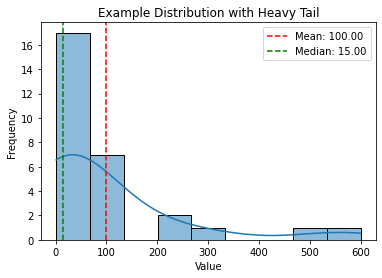

In [339]:
### your code and or answer here ###
'''
My Answer: (a)
    - There are a few extremely large values that significantly pull the average (mean) away from the median. 
'''
# Example distribution of 30 values
low_values = np.arange(1, 16)  # First 15 values from 1 to 15 to make median 15
high_values = [30, 60, 90, 100, 110, 115, 120, 125, 130, 235, 225, 320, 520, 600] # Other 15 value large to make mean 100

# Calculate the mean and median
data = np.concatenate([low_values, high_values])
mean = np.mean(data)
median = np.median(data)
print(f'Values: {data}\nCurrent Mean: {np.mean(data):.2f}, Current Median: {np.median(data):.2f}')

# Plotting
sns.histplot(data, kde=True)
plt.axvline(np.mean(data), color='r', linestyle='--', label='Mean: {:.2f}'.format(mean))
plt.axvline(np.median(data), color='g', linestyle='--', label='Median: {:.2f}'.format(median))
plt.title('Example Distribution with Heavy Tail')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.legend()
plt.show()
